<a href="https://colab.research.google.com/github/srivastavanimish/SHALA2020/blob/master/Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [22]:
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [23]:
titanic_data = pd.read_csv('sample_data/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic_data.shape

(891, 12)

In [25]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
drop_cols = ['Cabin', 'PassengerId', 'Name']
titanic_data = titanic_data.drop(columns=['Cabin', 'PassengerId', 'Name'], axis=1)

In [27]:
print(titanic_data.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64


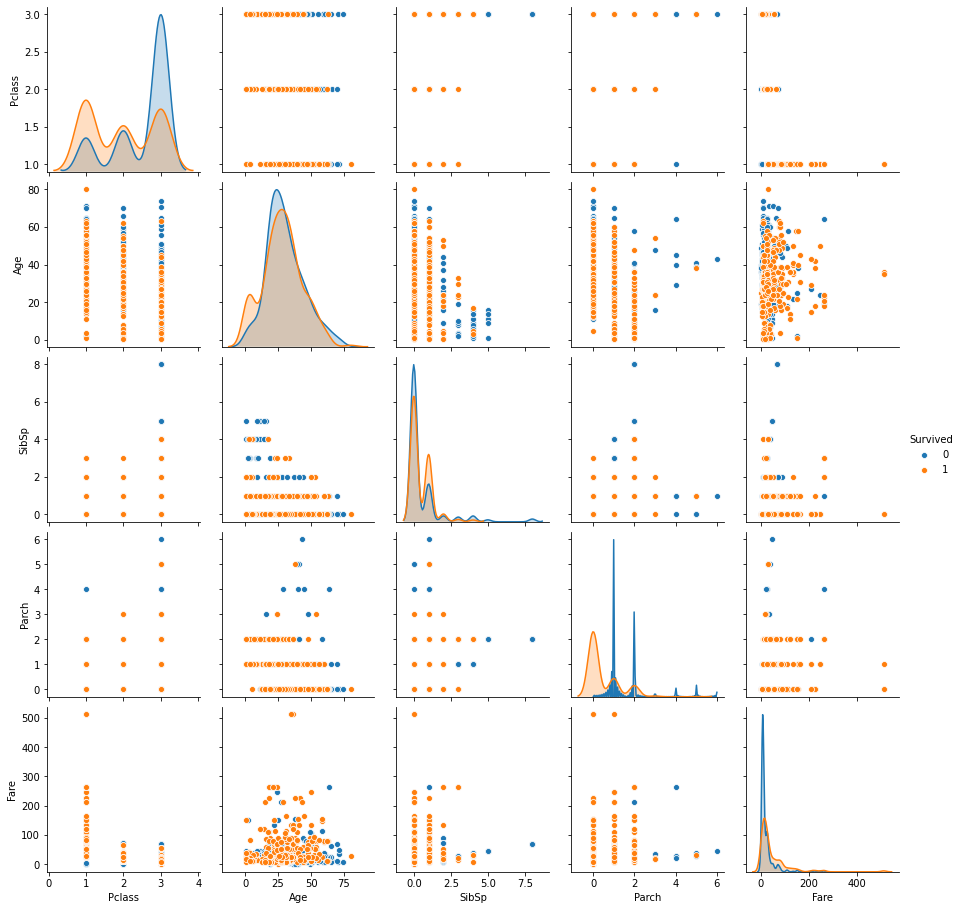

In [28]:
sns.pairplot(titanic_data, hue='Survived',)

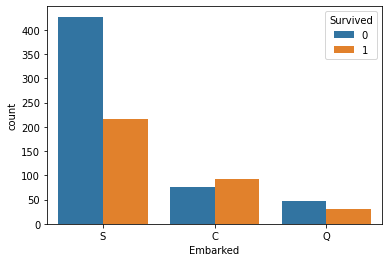

In [29]:
sns.countplot(x=titanic_data.Embarked,hue=titanic_data.Survived)

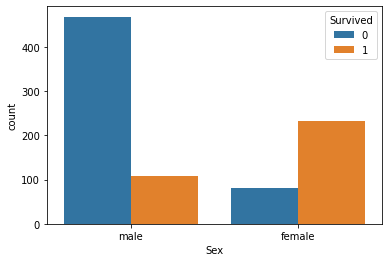

In [30]:
sns.countplot(x=titanic_data.Sex,hue=titanic_data.Survived)

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

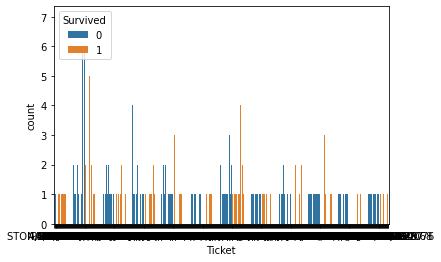

In [31]:
sns.countplot(x=titanic_data.Ticket,hue=titanic_data.Survived)
titanic_data.Ticket

In [32]:
titanic_data = titanic_data.drop(columns=['Ticket'], axis=1)
drop_cols.append('Ticket')

In [33]:
titanic_data.shape

(891, 8)

In [34]:
print(titanic_data.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [35]:
train_X, test_X, train_y, test_y = train_test_split(titanic_data.drop(columns='Survived'), titanic_data.Survived, test_size=0.2,random_state=43 ) 

In [36]:
print(train_X.isna().sum())

Pclass        0
Sex           0
Age         137
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [37]:
train_X_imp = train_X

Age_imp = train_X['Age'].median()
Embarked_imp = train_X['Embarked'].mode()[0]
#### can come up with other imputation values as well, even if they are not vacant anywhere in train eg:
Pcalss_imp = train_X['Pclass'].mode()[0]
SibSp_imp = train_X['SibSp'].mode()[0]
Fare_imp = train_X['Fare'].median()

#print(Embarked_imp)
train_X_imp['Age'] = train_X_imp['Age'].fillna(Age_imp)
train_X_imp['Embarked'] = train_X_imp['Embarked'].fillna(Embarked_imp)

In [38]:
print(train_X.isna().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [43]:
enc_cols = ['Sex','Pclass','Embarked']
train_X_enc = pd.get_dummies(train_X_imp, columns= enc_cols)

In [45]:
print(train_X_enc.isna().sum())

Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [46]:
#test_X = text_X.drop(columns = drop_cols)
test_X_imp = test_X

test_X_imp['Age'] = test_X_imp['Age'].fillna(Age_imp)
test_X_imp['Embarked'] = test_X_imp['Embarked'].fillna(Embarked_imp)

test_X_enc = pd.get_dummies(test_X_imp, columns= enc_cols)

In [47]:
print(test_X_enc.isna().sum())

Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [48]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=13)

xgb_classifier.fit(train_X_enc, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=13,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
pred_y = xgb_classifier.predict(test_X_enc)

Accuray: 0.8044692737430168
Precison: 0.8541666666666666


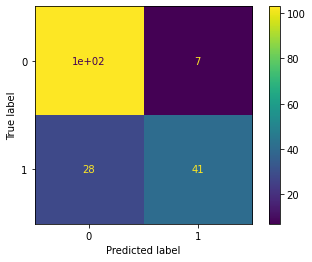

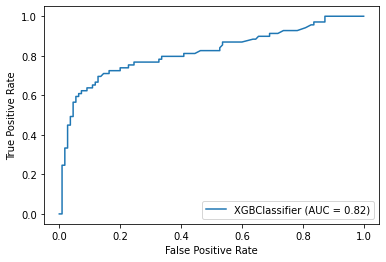

In [56]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, plot_roc_curve, precision_score, auc

print(plot_confusion_matrix(xgb_classifier, test_X_enc, test_y))
print("Accuray: "+str(accuracy_score(test_y, pred_y)))
print("Precison: "+str(precision_score(test_y, pred_y)))
print(plot_roc_curve(xgb_classifier, test_X_enc, test_y))